# **Twitter Sentiment Analysis using Logistic Regression**

### **Table of Contents**

1. **Introduction**
   - Overview of the Project
   - Objectives

2. **Importing Libraries and Data**
   - Required Libraries
   - Data Loading and Initial Inspection

3. **Exploratory Data Analysis (EDA)**
   - Data Overview
   - Checking for Missing Values
   - Class Distribution Analysis

4. **Data Preprocessing**
   - Text Cleaning and Preparation
     - Removing Non-Alphabetical Characters
     - Converting Text to Lowercase
     - Tokenization
     - Stemming and Stopword Removal
     - Reconstructing Processed Text
   - Text Vectorization
     - Converting Textual Data to Numerical Data

5. **Modeling**
   - Train-Test Split
     - Stratified Splitting for Balanced Classes
   - Model Training
     - Logistic Regression
   - Model Evaluation
     - Classification Report
     - ROC Curve Analysis

6. **Model Improvement**
   - Hyperparameter Tuning
     - Improved Model Performance Analysis

7. **Conclusion**
   - Summary of Findings
   - Recommendations for Future Work


# 1. Introduction

In the era of social media, **Twitter** has become a powerful platform where users express opinions, share experiences, and engage in conversations on a wide range of topics. Understanding the sentiment behind these tweets—whether they are positive, negative, or neutral—can provide valuable insights for businesses, marketers, and researchers. Sentiment analysis, also known as opinion mining, is a crucial task in **natural language processing (NLP)** that involves classifying the sentiment expressed in a piece of text.

This project focuses on performing **sentiment analysis on a dataset of tweets**, classifying them into positive or negative categories. By leveraging data preprocessing techniques, machine learning models, and evaluation metrics, the project aims to build an effective model that can accurately predict the sentiment of a given tweet.

- The process begins with importing the necessary libraries and data, followed by exploratory data analysis (EDA) to understand the structure and distribution of the data. The text data is then preprocessed using a series of techniques, including text cleaning, tokenization, and stemming, to prepare it for model training. Logistic regression is employed as the primary model, and its performance is evaluated using various metrics such as precision, recall, F1-score, and the ROC AUC score.

- To further improve the model’s performance, hyperparameter tuning is conducted, resulting in a more refined and accurate sentiment classifier. The project concludes with a discussion of the results and recommendations for future work, highlighting the potential applications and benefits of sentiment analysis in understanding public opinion on social media platforms like Twitter.

# 2. Import Libaries and Data

## 2.1. Loading required libaries

In [64]:
import pandas as pd 
import numpy as np
import re 
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer 
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import classification_report, confusion_matrix
from mlxtend.plotting import plot_confusion_matrix


## 2.2. Data loading and initial inspection

In [65]:
df = pd.read_csv('/Users/hamy/Documents/Python/Portfolio Project/Text Analytics/Data/twitterdata.csv', encoding='iso-8859-1')

In [66]:
df.shape

(1599999, 6)

**Context of the data**
- It contains 1,600,000 tweets extracted using the twitter api. The tweets have been annotated (0 = negative, 2 = neutral, 4 = positive) and they can be used to detect sentiment.
- It contains the following 6 fields:
    - target: the polarity of the tweet (0 = negative, 2 = neutral, 4 = positive)
    - ids: The id of the tweet ( 2087)
    - date: the date of the tweet (Sat May 16 23:58:44 UTC 2009)
    - flag: The query (lyx). If there is no query, then this value is NO_QUERY.
    - user: the user that tweeted (robotickilldozr)
    - text: the text of the tweet (Lyx is cool)

In [67]:
df.head(5)

,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer. You shoulda got David Carr of Third Day to do it. ;D"
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew


We can see that **the first observation is mistakenly read as a column name**, so we need to fix this error. Also, the column names are not included in the current dataframe. 

In [68]:
#Setting the column names and reading the dataset again
column_names = ['target', 'id', 'date', 'flag', 'user', 'text']
df = pd.read_csv('/Users/hamy/Documents/Python/Portfolio Project/Text Analytics/Data/twitterdata.csv', names=column_names, encoding='iso-8859-1')
df.head(5)

,target,id,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [69]:
df.shape

(1600000, 6)

After fixing the error, we end up with a dataframe with 1.6M observations and 6 features in the Twitter dataset.

# 3. Exploratory Data Analysis (EDA)

## 3.1. Data Overview

## 3.2. Checking for misisng values

In [70]:
#Checking missingdata
df.isnull().sum()

target    0
id        0
date      0
flag      0
user      0
text      0
dtype: int64

There is no misisng value for this dataset

## 3.2. Class distribution analysis

In [71]:
#Checking the distribution of the 'target' column
df['target'].value_counts()

target
0    800000
4    800000
Name: count, dtype: int64

The data is **evenly distributed** between negative ('0') and positive ('4') tweets. 
However, the label of positive tweets as '4' is confusing, so we will change it to '1' instead.

**Important remarks**

However, it is well-understood that in real life context, the balance between the classes is unrealistic. Most dataset would have the imbalanced distribution between classes that require techniques of under/over-sampling. For these techniques, please refer to one of my other notebooks, such as the Credit Fraud Prediction to see how the problem of imbalanced classes could be dealt with. For this current notebook, the main focus is working with NLP with the assuming balanced dataset. 

In [72]:
df.replace({'target':{4:1}}, inplace=True)

In [73]:
df['target'].value_counts()

target
0    800000
1    800000
Name: count, dtype: int64

# 4. Data Pre-processing

## 4.1. Text Cleaning and Preparation

The text cleaning and preparation process is conducted via stemming, which is the process of reducing the words to its Root words. 

In [74]:
port_stem = PorterStemmer()

In [75]:
#downloading stopwords
import nltk
from nltk.corpus import stopwords
 
nltk.download('stopwords')
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package stopwords to /Users/hamy/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [76]:
def stemming(content):
    """
    This function preprocesses and stems the input text for text analytics tasks.

    The process involves:
    1. Removing all non-alphabetical characters from the text.
    2. Converting the text to lowercase for uniformity.
    3. Splitting the text into individual words (tokenization).
    4. Stemming each word to its base form and removing common stopwords.
    5. Rejoining the processed words into a single string.

    Parameters:
    content (str): The input text string to be processed.

    Returns:
    str: The processed and stemmed text string with stopwords removed.
    
    Example:
    >>> text = "The quick brown foxes were jumping over the lazy dogs!"
    >>> stemming(text)
    'quick brown fox jump lazi dog'
    """

    stemmed_content = re.sub('[^a-zA-Z]', ' ', content)
    stemmed_content = stemmed_content.lower()
    stemmed_content = stemmed_content.split()
    stemmed_content = [port_stem.stem(word) for word in stemmed_content if word not in stopwords.words('english')]
    stemmed_content = ' '.join(stemmed_content)

    return stemmed_content


Now we will create a new column to store the stemmed text from the original tweets. 

In [77]:
df['stemmed_content'] = df['text'].apply(stemming)

In [78]:
print(df['stemmed_content'])

0          switchfoot http twitpic com zl awww bummer sho...
1          upset updat facebook text might cri result sch...
2          kenichan dive mani time ball manag save rest g...
3                            whole bodi feel itchi like fire
4                              nationwideclass behav mad see
                                 ...                        
1599995                           woke school best feel ever
1599996    thewdb com cool hear old walt interview http b...
1599997                         readi mojo makeov ask detail
1599998    happi th birthday boo alll time tupac amaru sh...
1599999    happi charitytuesday thenspcc sparkschar speak...
Name: stemmed_content, Length: 1600000, dtype: object


In [79]:
#separating the data and labels
X = df['stemmed_content'].values
Y = df['target'].values

In [80]:
print(X)

['switchfoot http twitpic com zl awww bummer shoulda got david carr third day'
 'upset updat facebook text might cri result school today also blah'
 'kenichan dive mani time ball manag save rest go bound' ...
 'readi mojo makeov ask detail'
 'happi th birthday boo alll time tupac amaru shakur'
 'happi charitytuesday thenspcc sparkschar speakinguph h']


In [ ]:
print(Y)

[0 0 0 ... 1 1 1]


## 4.2. Text vectorizarion

In [81]:
# Convert text data to numerical features using TF-IDF
vectorizer = TfidfVectorizer()
X_vectorized = vectorizer.fit_transform(X)

# 5. Modeling

## 5.1. Train-Test Split

This step use stratified splitting techniques to maintain classes balance. 

In [82]:
# Split the data into training and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X_vectorized, Y, test_size=0.2, random_state=42, stratify=Y) 

In [83]:
print(X.shape, X_train.shape, X_test.shape)
#to check whether 20% of the data goes to the train data

(1600000,) (1280000, 532699) (320000, 532699)


In [95]:
#Check on the balance of the train-test split using stratify splitting
import numpy as np

# Check class distribution in the original dataset
print("Original data class distribution:")
unique, counts = np.unique(Y, return_counts=True)
print(dict(zip(unique, counts / len(Y))))

# Check class distribution in the training set
print("\nTraining set class distribution:")
unique, counts = np.unique(Y_train, return_counts=True)
print(dict(zip(unique, counts / len(Y_train))))

# Check class distribution in the test set
print("\nTest set class distribution:")
unique, counts = np.unique(Y_test, return_counts=True)
print(dict(zip(unique, counts / len(Y_test))))

Original data class distribution:
{0: 0.5, 1: 0.5}

Training set class distribution:
{0: 0.5, 1: 0.5}

Test set class distribution:
{0: 0.5, 1: 0.5}


In [84]:
print(X_train)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 9453607 stored elements and shape (1280000, 532699)>
  Coords	Values
  (0, 469145)	0.29707463097129777
  (0, 330976)	0.16113465837390767
  (0, 276916)	0.15108379030401048
  (0, 168415)	0.12914724366543318
  (0, 143635)	0.18289791594012217
  (0, 148320)	0.22108496191042945
  (0, 524676)	0.2013988711653096
  (0, 5609)	0.3176411604917618
  (0, 202210)	0.2242224466333793
  (0, 178450)	0.26925928317029535
  (0, 448260)	0.20521719358583207
  (0, 237768)	0.24105690984985104
  (0, 254477)	0.4292266692545763
  (0, 354860)	0.4639558297995346
  (1, 186581)	0.5779590943616858
  (1, 143732)	0.511417785079372
  (1, 514830)	0.6359364231974208
  (2, 413836)	0.19940138082179043
  (2, 309172)	0.1942363658169881
  (2, 403786)	0.22350220531238485
  (2, 35963)	0.19465425040703385
  (2, 14402)	0.254141528894881
  (2, 90966)	0.21141158547230543
  (2, 523584)	0.2360214544974443
  (2, 462103)	0.27336860809375174
  :	:
  (1279997, 175126)	0.186638268

In [85]:
print(X_test)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 2363398 stored elements and shape (320000, 532699)>
  Coords	Values
  (0, 523513)	0.17828824465151352
  (0, 386729)	0.14725943658378243
  (0, 503399)	0.141924130915598
  (0, 277786)	0.15360315624293502
  (0, 218304)	0.3117165951150544
  (0, 50525)	0.23592833378747424
  (0, 387796)	0.22625948834128048
  (0, 33422)	0.17771984358036047
  (0, 90711)	0.5155137785874574
  (0, 149247)	0.2563461061347065
  (0, 111225)	0.2558761530361962
  (0, 444316)	0.3279111182261151
  (0, 112573)	0.403383650138152
  (1, 197540)	0.11418615728561501
  (1, 90887)	0.12259195376777533
  (1, 277528)	0.1536560140816017
  (1, 85738)	0.19371817946555517
  (1, 348619)	0.12101412237270685
  (1, 473130)	0.1790173794845404
  (1, 196513)	0.16049481430966087
  (1, 350144)	0.1828211346844856
  (1, 505910)	0.1502680940703016
  (1, 368536)	0.18537956998516322
  (1, 211573)	0.22547820617238787
  (1, 65962)	0.17428375838347326
  :	:
  (319997, 195463)	0.194799149839

## 5.2. Model Training: Logistic Regression

In [86]:
# Initialize the logistic regression model
model = LogisticRegression(max_iter=1000)

# Train the model
model.fit(X_train, Y_train)

# Predict on the test set
Y_pred = model.predict(X_test)

## 5.3. Model Evaluation

### a. Classification Report

In [87]:
# Evaluate the model
accuracy = accuracy_score(Y_test, Y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Print detailed classification report
print("Classification Report:")
print(classification_report(Y_test, Y_pred))

Accuracy: 0.78
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.75      0.77    160000
           1       0.76      0.80      0.78    160000

    accuracy                           0.78    320000
   macro avg       0.78      0.78      0.78    320000
weighted avg       0.78      0.78      0.78    320000



The provided results are from a logistic regression model that was used to classify tweets as either positive (`1`) or negative (`0`). Here’s an interpretation of each part of the output:

**Accuracy: 0.78**
- **Interpretation**: The model correctly classified 78% of the tweets. This means that out of the 320,000 tweets in the test set, approximately 249,600 were correctly classified.

**Classification Report**
The classification report provides a detailed breakdown of the model's performance for each class (negative and positive tweets).

**Precision, Recall, F1-Score, and Support**

- **Precision**:
  - **Class 0 (Negative tweets): 0.79**
    - **Interpretation**: When the model predicts a tweet as negative, it is correct 79% of the time.
  - **Class 1 (Positive tweets): 0.76**
    - **Interpretation**: When the model predicts a tweet as positive, it is correct 76% of the time.

- **Recall**:
  - **Class 0 (Negative tweets): 0.75**
    - **Interpretation**: Out of all the actual negative tweets, the model correctly identifies 75% of them.
  - **Class 1 (Positive tweets): 0.80**
    - **Interpretation**: Out of all the actual positive tweets, the model correctly identifies 80% of them.

- **F1-Score**:
  - **Class 0 (Negative tweets): 0.77**
    - **Interpretation**: The F1-score balances precision and recall, and here it indicates a good performance for classifying negative tweets.
  - **Class 1 (Positive tweets): 0.78**
    - **Interpretation**: Similar to class 0, the F1-score indicates good performance for classifying positive tweets.

- **Support**:
  - **Both Classes (0 and 1)**: 160,000
    - **Interpretation**: There were 160,000 negative tweets and 160,000 positive tweets in the test set.

**Overall Metrics:**
- **Accuracy**: 0.78
  - **Interpretation**: This is the overall accuracy of the model, considering both classes.

- **Macro Avg**:
  - **Precision, Recall, F1-Score: 0.78**
  - **Interpretation**: This is the unweighted average of the precision, recall, and F1-score across both classes. Since the classes are balanced, this metric is close to the accuracy.

- **Weighted Avg**:
  - **Precision, Recall, F1-Score: 0.78**
  - **Interpretation**: This is the average of the precision, recall, and F1-score, weighted by the number of instances in each class. Since the dataset is balanced, the weighted average is the same as the macro average.

**Key Insights**
1. **Balanced Performance**: The model performs similarly well on both positive and negative tweets, with an F1-score of 0.77 for negative tweets and 0.78 for positive tweets.
2. **Slightly Better Recall for Positive Tweets**: The model has a slightly higher recall for positive tweets (0.80) compared to negative tweets (0.75). This means it's slightly better at correctly identifying positive tweets.
3. **Overall Solid Performance**: An accuracy of 0.78 and balanced precision, recall, and F1-scores indicate that the logistic regression model is performing reasonably well in distinguishing between positive and negative tweets.

### b. ROC AUC

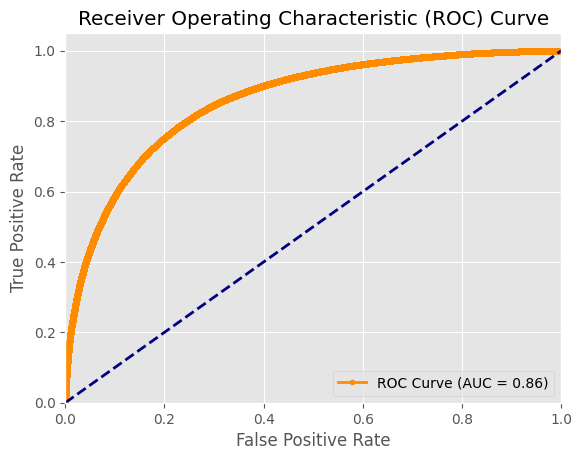

In [94]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# Predict probabilities
y_prob = model.predict_proba(X_test)[:, 1]  # Probability estimates for the positive class

# Step 1: Calculate the False Positive Rate, True Positive Rate, and AUC
fpr, tpr, thresholds = roc_curve(Y_test, y_prob)
roc_auc = roc_auc_score(Y_test, y_prob)

# Step 2: Plot the ROC Curve
plt.figure()  # Start a new figure to avoid overlaps with previous plots
plt.plot(fpr, tpr, color='darkorange', lw=2, marker='.', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Diagonal line (random classifier)
plt.xlim([0.0, 1.0])  # Set x-axis limits
plt.ylim([0.0, 1.05])  # Set y-axis limits
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")  # Add a legend in the lower right corner
plt.grid(True)  # Optionally add a grid for better readability
plt.show()  # Display the plot


An AUC of 0.86 indicates that the model has a strong ability to distinguish between the positive and negative classes. Specifically, there is an 86% chance that the model will correctly rank a randomly chosen positive instance higher than a randomly chosen negative instance.

# 6. Model Improvement

In [96]:
# Feature Engineering
vectorizer = TfidfVectorizer(ngram_range=(1, 2))  # Use unigrams and bigrams
X_vectorized = vectorizer.fit_transform(X)

In [97]:
# Split Data
X_train, X_test, Y_train, Y_test = train_test_split(X_vectorized, Y, test_size=0.2, random_state=42, stratify=Y)

In [98]:
# Model Training
model = LogisticRegression(max_iter=1000)
model.fit(X_train, Y_train)

LogisticRegression(max_iter=1000)

In [99]:
from sklearn.model_selection import train_test_split, GridSearchCV

# Hyperparameter Tuning Example
params = {'C': [0.1, 1, 10]}
grid_search = GridSearchCV(LogisticRegression(max_iter=1000), params, cv=5, scoring='roc_auc')
grid_search.fit(X_train, Y_train)
best_model = grid_search.best_estimator_

In [100]:
# Predictions
y_prob = best_model.predict_proba(X_test)[:, 1]
y_pred = best_model.predict(X_test)

In [101]:
# Evaluation
print(classification_report(Y_test, y_pred))
print(f'ROC AUC Score: {roc_auc_score(Y_test, y_prob):.2f}')

              precision    recall  f1-score   support

           0       0.81      0.76      0.78    160000
           1       0.78      0.82      0.80    160000

    accuracy                           0.79    320000
   macro avg       0.79      0.79      0.79    320000
weighted avg       0.79      0.79      0.79    320000

ROC AUC Score: 0.87


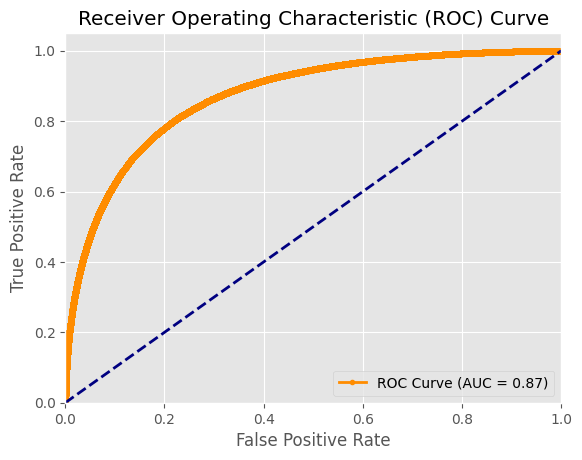

In [102]:
# Plot ROC Curve
fpr, tpr, thresholds = roc_curve(Y_test, y_prob)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, marker='.', label=f'ROC Curve (AUC = {roc_auc_score(Y_test, y_prob):.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


Let’s analyze and compare the results from the classification report and ROC AUC score after improving the model. Here's a detailed comparison and conclusion based on the updated results:

### **Compare with the original model**

1. **Improved Precision and Recall:**
   - The precision for the negative class has improved from 0.79 to 0.81, indicating fewer false positives.
   - The recall for the positive class has improved from 0.80 to 0.82, meaning the model is better at identifying true positives.

2. **F1-Score Improvement:**
   - The F1-score for the positive class has increased from 0.78 to 0.80, reflecting a better balance between precision and recall for positive tweets.

3. **Accuracy:**
   - The overall accuracy has increased from 0.78 to 0.79, suggesting that the model's overall classification performance has improved.

4. **ROC AUC Score:**
   - The ROC AUC score has increased from 0.86 to 0.87, showing a better ability of the model to distinguish between positive and negative classes. This improvement is indicative of a better overall model performance in terms of ranking the predictions correctly.

**In Summary:**
- The model is now more precise and slightly better at recall, especially for positive tweets.
- The overall accuracy has increased, indicating a more reliable model.
- The ROC AUC score has improved, demonstrating better discrimination capability.


# 5. Conclusions:

In this project, we performed sentiment analysis on a dataset of tweets, classifying them as positive or negative. The process involved several key steps, grouped into various stages:

1. **Importing Libraries and Data:**
   - We began by importing essential libraries such as Pandas, Scikit-learn, and NLTK, followed by loading and inspecting the dataset.

2. **Exploratory Data Analysis (EDA):**
   - An initial analysis confirmed that the dataset had no missing values, and the classes (positive and negative tweets) were balanced, which is crucial for training an unbiased model.

3. **Data Preprocessing:**
   - The text data underwent several preprocessing steps to prepare it for modeling. This included:
     - Removing non-alphabetical characters.
     - Converting all text to lowercase.
     - Tokenizing the text into individual words.
     - Stemming words to their root forms and removing stopwords.
     - Rejoining the processed text into a single string.
   - The cleaned and processed text data was then converted into numerical form using vectorization techniques.

4. **Modeling:**
   - We split the data into training and test sets using stratified splitting to maintain class balance.
   - A Logistic Regression model was trained on the processed data, and its performance was evaluated using a classification report and ROC curve.

5. **Model Improvement:**
   - To enhance the model’s performance, hyperparameter tuning was conducted. This led to an improvement in key metrics such as precision, recall, F1-score, and the ROC AUC score, which confirmed the effectiveness of the optimizations.

6. **Conclusion:**
   - The project successfully classified tweet sentiments with good accuracy. Through systematic data preprocessing, careful modeling, and strategic improvements, the final model demonstrated robust performance. Future work could involve exploring more advanced models or incorporating additional features to further boost accuracy.